In [45]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.layers import Dropout, Flatten, Activation, Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn 

from tqdm import tqdm

In [46]:
data_imgs = np.load('../Kanji-recognizer/data/kkanj-imgs.npz')
data_labels = np.load('../Kanji-recognizer/data/kkanji-labels.npz')

imgs = data_imgs['arr_0']
labels = data_labels['arr_0']

def kanji(kaniUnicode):
    return chr(int(kaniUnicode[2:], 16))

X = imgs[:14000]
Z = labels[:14000]


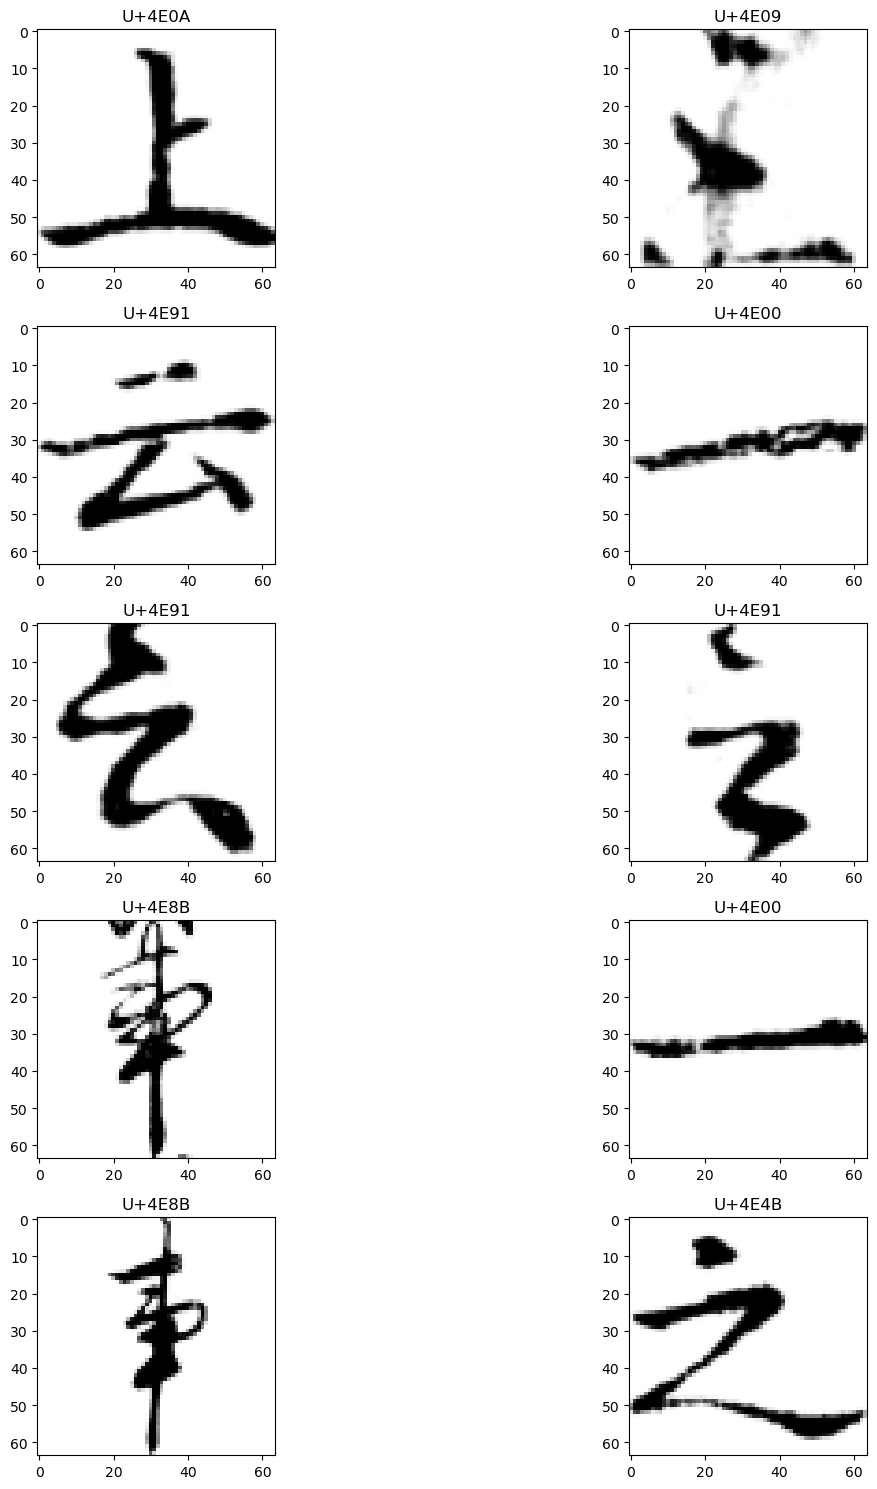

In [47]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range(2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l], cmap='Greys')
        ax[i,j].set_title(Z[l])
        
        
plt.tight_layout()

In [48]:
len(np.unique(Z))

79

In [49]:
le=LabelEncoder()


Y=le.fit_transform(Z)


Y=to_categorical(Y,len(np.unique(Z)))


X=np.array(X)


X=X/255


In [50]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.25, random_state=42)
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [51]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size= (3,3), padding= 'Same', activation='relu', input_shape = (64,64, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size= (3,3), padding= 'Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 96, kernel_size= (1,1), padding= 'Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 96, kernel_size= (1,1), padding= 'Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(79, activation="softmax"))

In [52]:
batch_size=200
epochs=10

from keras.callbacks import ReduceLROnPlateau
red_lr = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1,factor=0.1)

In [53]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=False,
    vertical_flip=False
)

#datagen.fit(x_train.reshape(10500, 64, 64, 1))

In [54]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 96)        6240      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 8, 8, 96)        

In [56]:
History = model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test), verbose=1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/10
52/52 [==============================] - 30s 540ms/step - loss: 1.8959 - accuracy: 0.5804 - val_loss: 0.8656 - val_accuracy: 0.7889
Epoch 2/10
52/52 [==============================] - 25s 489ms/step - loss: 0.6438 - accuracy: 0.8447 - val_loss: 0.4511 - val_accuracy: 0.8874
Epoch 3/10
52/52 [==============================] - 24s 466ms/step - loss: 0.3480 - accuracy: 0.9113 - val_loss: 0.3056 - val_accuracy: 0.9240
Epoch 4/10
52/52 [==============================] - 24s 460ms/step - loss: 0.2137 - accuracy: 0.9417 - val_loss: 0.2584 - val_accuracy: 0.9294
Epoch 5/10
52/52 [==============================] - 24s 452ms/step - loss: 0.1427 - accuracy: 0.9612 - val_loss: 0.2244 - val_accuracy: 0.9423
Epoch 6/10
52/52 [==============================] - 23s 452ms/step - loss: 0.0952 - accuracy: 0.9735 - val_loss: 0.2197 - val_accuracy: 0.9446
Epoch 7/10
52/52 [==============================] - 24s 462ms/step - loss: 0.0613 - accuracy: 0.9840 - val_loss: 0.2358 - val_accuracy: 0.9457

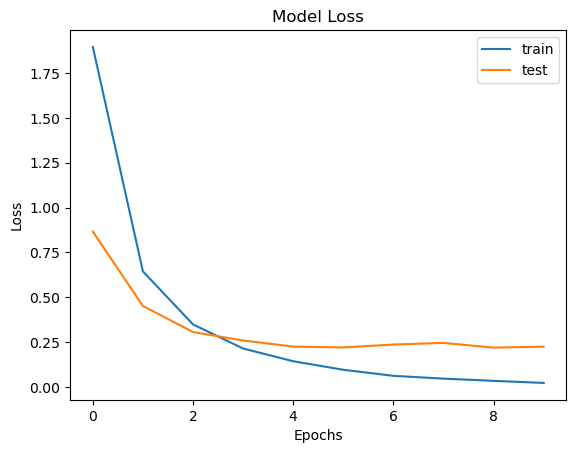

In [57]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

110/110 [==============================] - 2s 18ms/step - loss: 0.2241 - accuracy: 0.9554
Test loss: 0.2241092324256897
Test accuracy: 0.9554286003112793

# Generate predictions for 1 sample
1/1 [==============================] - 0s 29ms/step
Predictions shape: (1, 79)
Predictions: [[1.26961887e-11 5.57450050e-12 4.94501350e-11 1.14812913e-07
  4.55901583e-09 1.65221326e-11 2.88178637e-09 1.41275358e-09
  9.96480196e-08 7.23982341e-09 1.66867475e-12 2.73056768e-11
  4.90377872e-08 6.83437291e-12 2.54917557e-16 8.58319041e-11
  1.18667831e-08 2.34373237e-14 3.89851836e-18 1.16797284e-12
  9.76496661e-12 9.50915846e-14 1.02606996e-12 3.24644667e-08
  3.88946904e-12 9.99987125e-01 2.38034020e-11 2.40827736e-09
  6.78378415e-13 7.80629698e-14 1.44992742e-12 9.92688101e-08
  2.18615043e-13 1.69526516e-13 1.61672375e-09 9.14894463e-06
  4.94780107e-13 2.54422912e-06 1.01434364e-13 4.68697780e-13
  1.86116279e-18 5.36077363e-11 2.77327650e-15 1.29148810e-11
  1.17867182e-13 6.73710732e-09 5.1

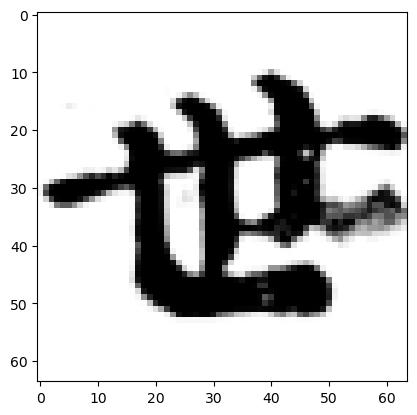

In [110]:
from matplotlib import pyplot

results = model.evaluate(x_test, y_test)
print('Test loss:', results[0])
print('Test accuracy:', results[1])
image_number = 1200
print('\n# Generate predictions for 1 sample')
new_image = tf.expand_dims(x_test[image_number], 0)
predictions = model.predict(new_image)
print('Predictions shape:', predictions.shape)
print('Predictions:', predictions)
predicted_classes = predictions.argmax(axis=-1)
print('Predicted class:', predicted_classes)

pyplot.imshow(x_test[image_number], cmap='Greys')
#print(kanji(y_test[image_number]))


In [111]:
print(np.unique(Z)[predicted_classes][0])
print(kanji(np.unique(Z)[predicted_classes][0]))


U+4E16
世
